<a href="https://colab.research.google.com/github/Vishy-A/MachineLearningIntro/blob/main/HW5/4105HW5P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
#Vishy Adusumilli
#801185663
#HW 5 Problem 1
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems = 2, linewidth = 75)
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [224]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = .01 * t_u          #unsure why this is an issue, the textbook says to use .1 but that results in "nan"
b = torch.zeros(())

In [225]:
def model(t_u, w1, w2, b):
  return w2 * t_u ** 2 + w1 * t_u + b


In [226]:
def loss_func(t_p,t_c):
  squared_diffs = (t_p - t_c) ** 2
  return squared_diffs.mean()

In [227]:
def training(epochs, optimizer, params, t_u, t_c):
  for epoch in range(1, epochs + 1):
    t_p = model(t_u, *params)
    loss = loss_func(t_p, t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))

  return params

In [228]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learningrate = .1
optimizer = optim.SGD([params], lr = learningrate)

training(
    epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_u =  t_un,
    t_c = t_c
    )


Epoch 500, Loss 2.108456
Epoch 1000, Loss 2.090728
Epoch 1500, Loss 2.090720
Epoch 2000, Loss 2.090720
Epoch 2500, Loss 2.090721
Epoch 3000, Loss 2.090719
Epoch 3500, Loss 2.090720
Epoch 4000, Loss 2.090720
Epoch 4500, Loss 2.090720
Epoch 5000, Loss 2.090720


tensor([ 24.7210,  28.3420, -10.6403], requires_grad=True)

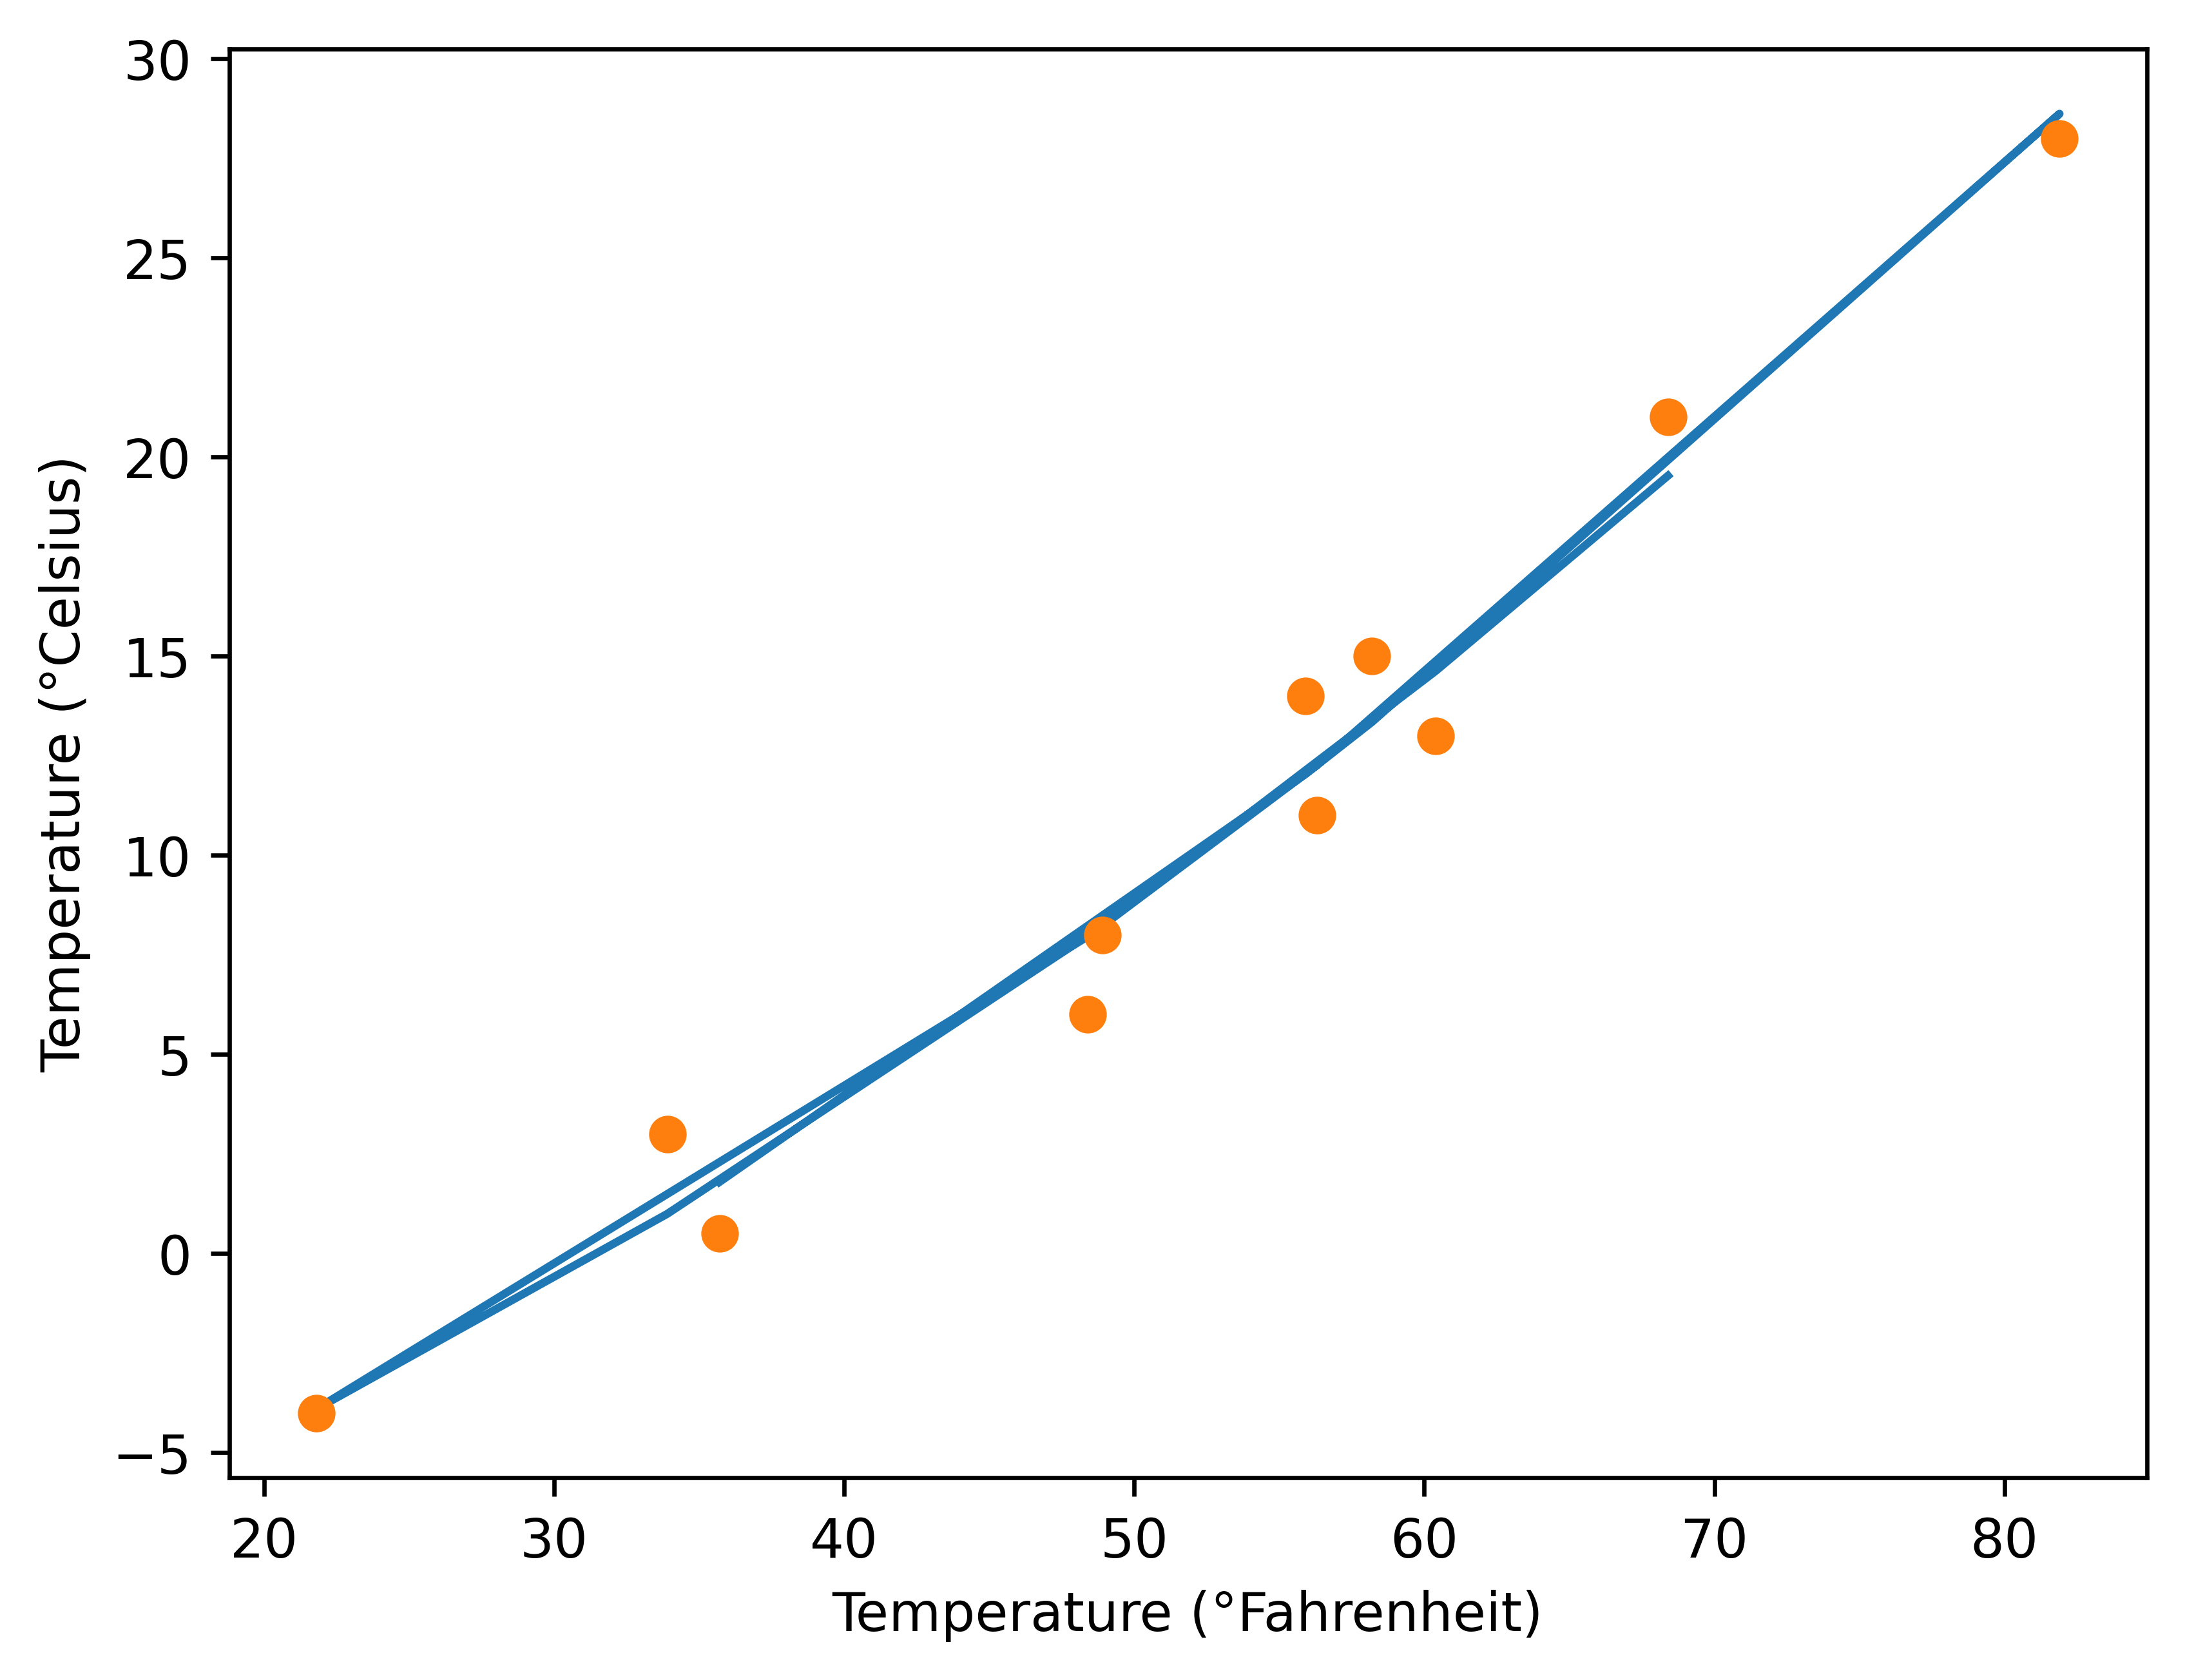

In [229]:
#Has lowest loss
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")



In [230]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learningrate = .01
optimizer = optim.SGD([params], lr = learningrate)

training(
    epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_u =  t_un,
    t_c = t_c
    )

Epoch 500, Loss 26.266186
Epoch 1000, Loss 12.949670
Epoch 1500, Loss 6.968258
Epoch 2000, Loss 4.281574
Epoch 2500, Loss 3.074787
Epoch 3000, Loss 2.532740
Epoch 3500, Loss 2.289264
Epoch 4000, Loss 2.179901
Epoch 4500, Loss 2.130778
Epoch 5000, Loss 2.108713


tensor([ 24.3412,  27.9050, -10.3017], requires_grad=True)

In [231]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learningrate = .001
optimizer = optim.SGD([params], lr = learningrate)

training(
    epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_u =  t_un,
    t_c = t_c
    )

Epoch 500, Loss 58.822189
Epoch 1000, Loss 48.348232
Epoch 1500, Loss 44.396774
Epoch 2000, Loss 41.118404
Epoch 2500, Loss 38.115955
Epoch 3000, Loss 35.345898
Epoch 3500, Loss 32.788918
Epoch 4000, Loss 30.428556
Epoch 4500, Loss 28.249678
Epoch 5000, Loss 26.238340


tensor([11.5393, 11.6079,  1.5983], requires_grad=True)

In [232]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learningrate = .0001
optimizer = optim.SGD([params], lr = learningrate)

training(
    epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_u =  t_un,
    t_c = t_c
    )

Epoch 500, Loss 138.825058
Epoch 1000, Loss 118.428955
Epoch 1500, Loss 102.817139
Epoch 2000, Loss 90.845161
Epoch 2500, Loss 81.642403
Epoch 3000, Loss 74.546761
Epoch 3500, Loss 69.054512
Epoch 4000, Loss 64.782639
Epoch 4500, Loss 61.439720
Epoch 5000, Loss 58.804115


tensor([4.8014, 3.7440, 4.9612], requires_grad=True)

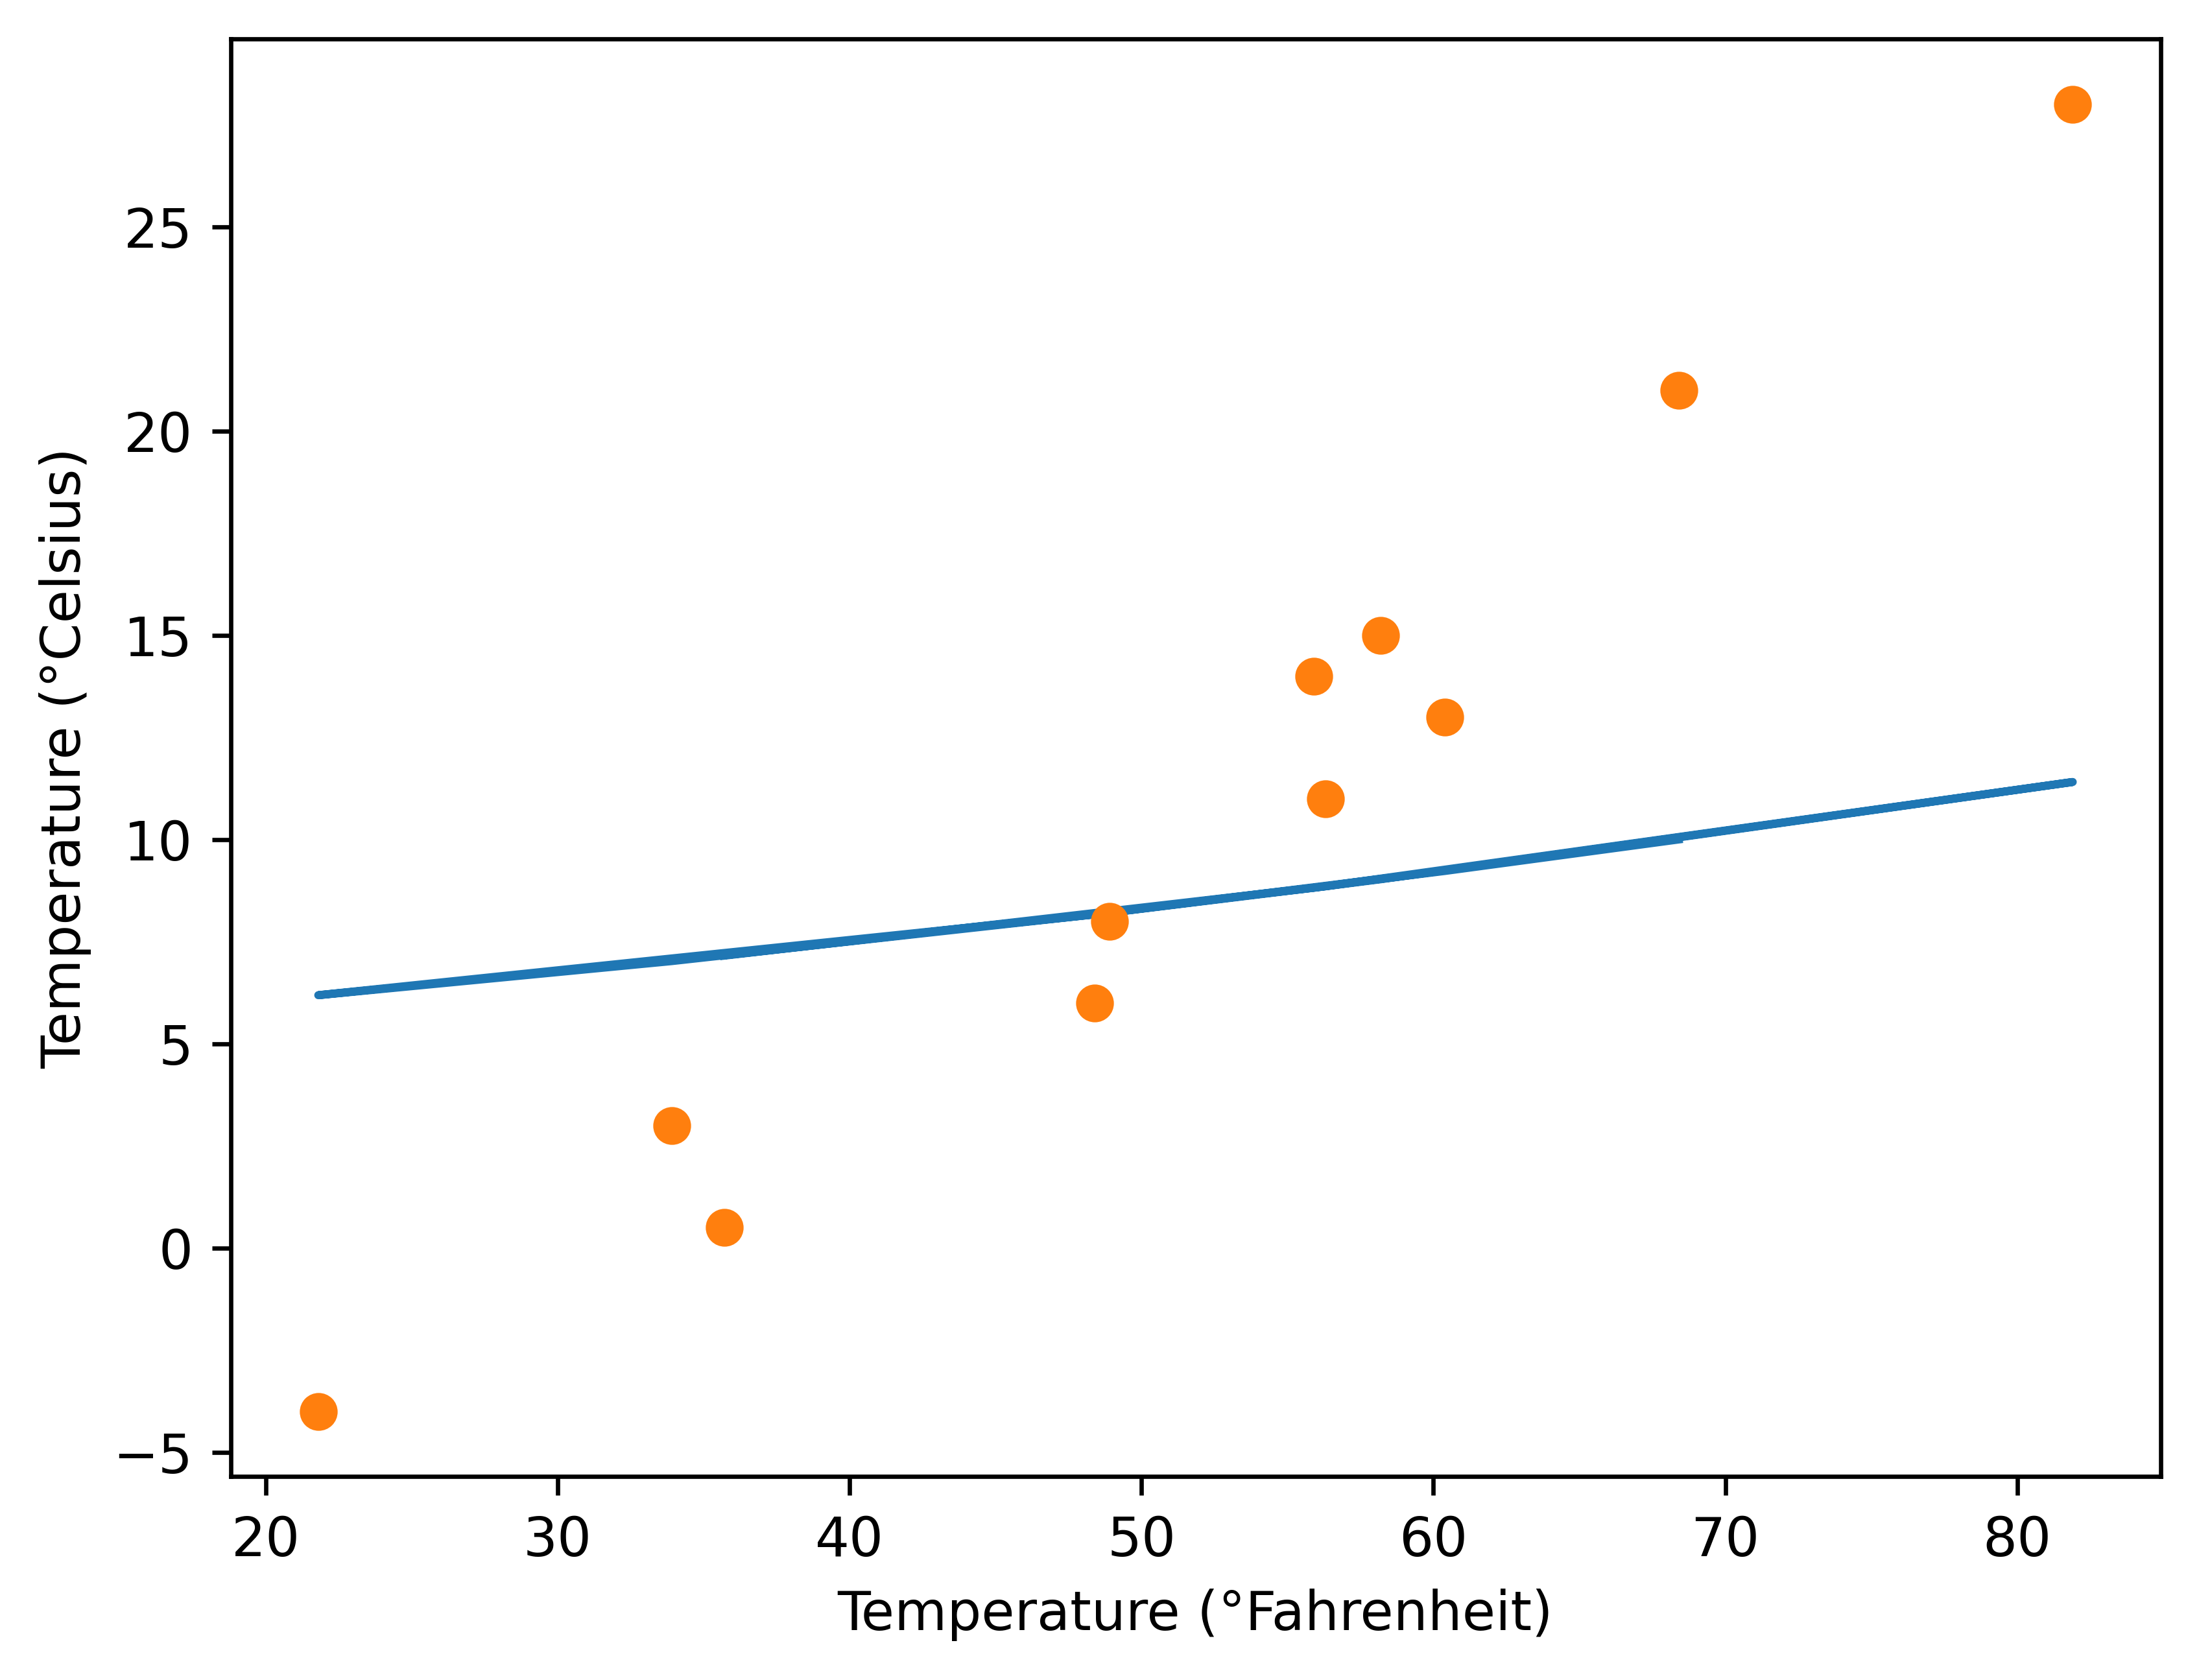

In [233]:

%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")



In [234]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learningrate = .1
optimizer = optim.Adam([params], lr = learningrate)

training(
    epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_u =  t_un,
    t_c = t_c
    )

Epoch 500, Loss 7.720603
Epoch 1000, Loss 2.183957
Epoch 1500, Loss 2.105043
Epoch 2000, Loss 2.103428
Epoch 2500, Loss 2.101665
Epoch 3000, Loss 2.099716
Epoch 3500, Loss 2.097688
Epoch 4000, Loss 2.095724
Epoch 4500, Loss 2.093984
Epoch 5000, Loss 2.092600


tensor([ 23.3667,  29.6354, -10.3189], requires_grad=True)

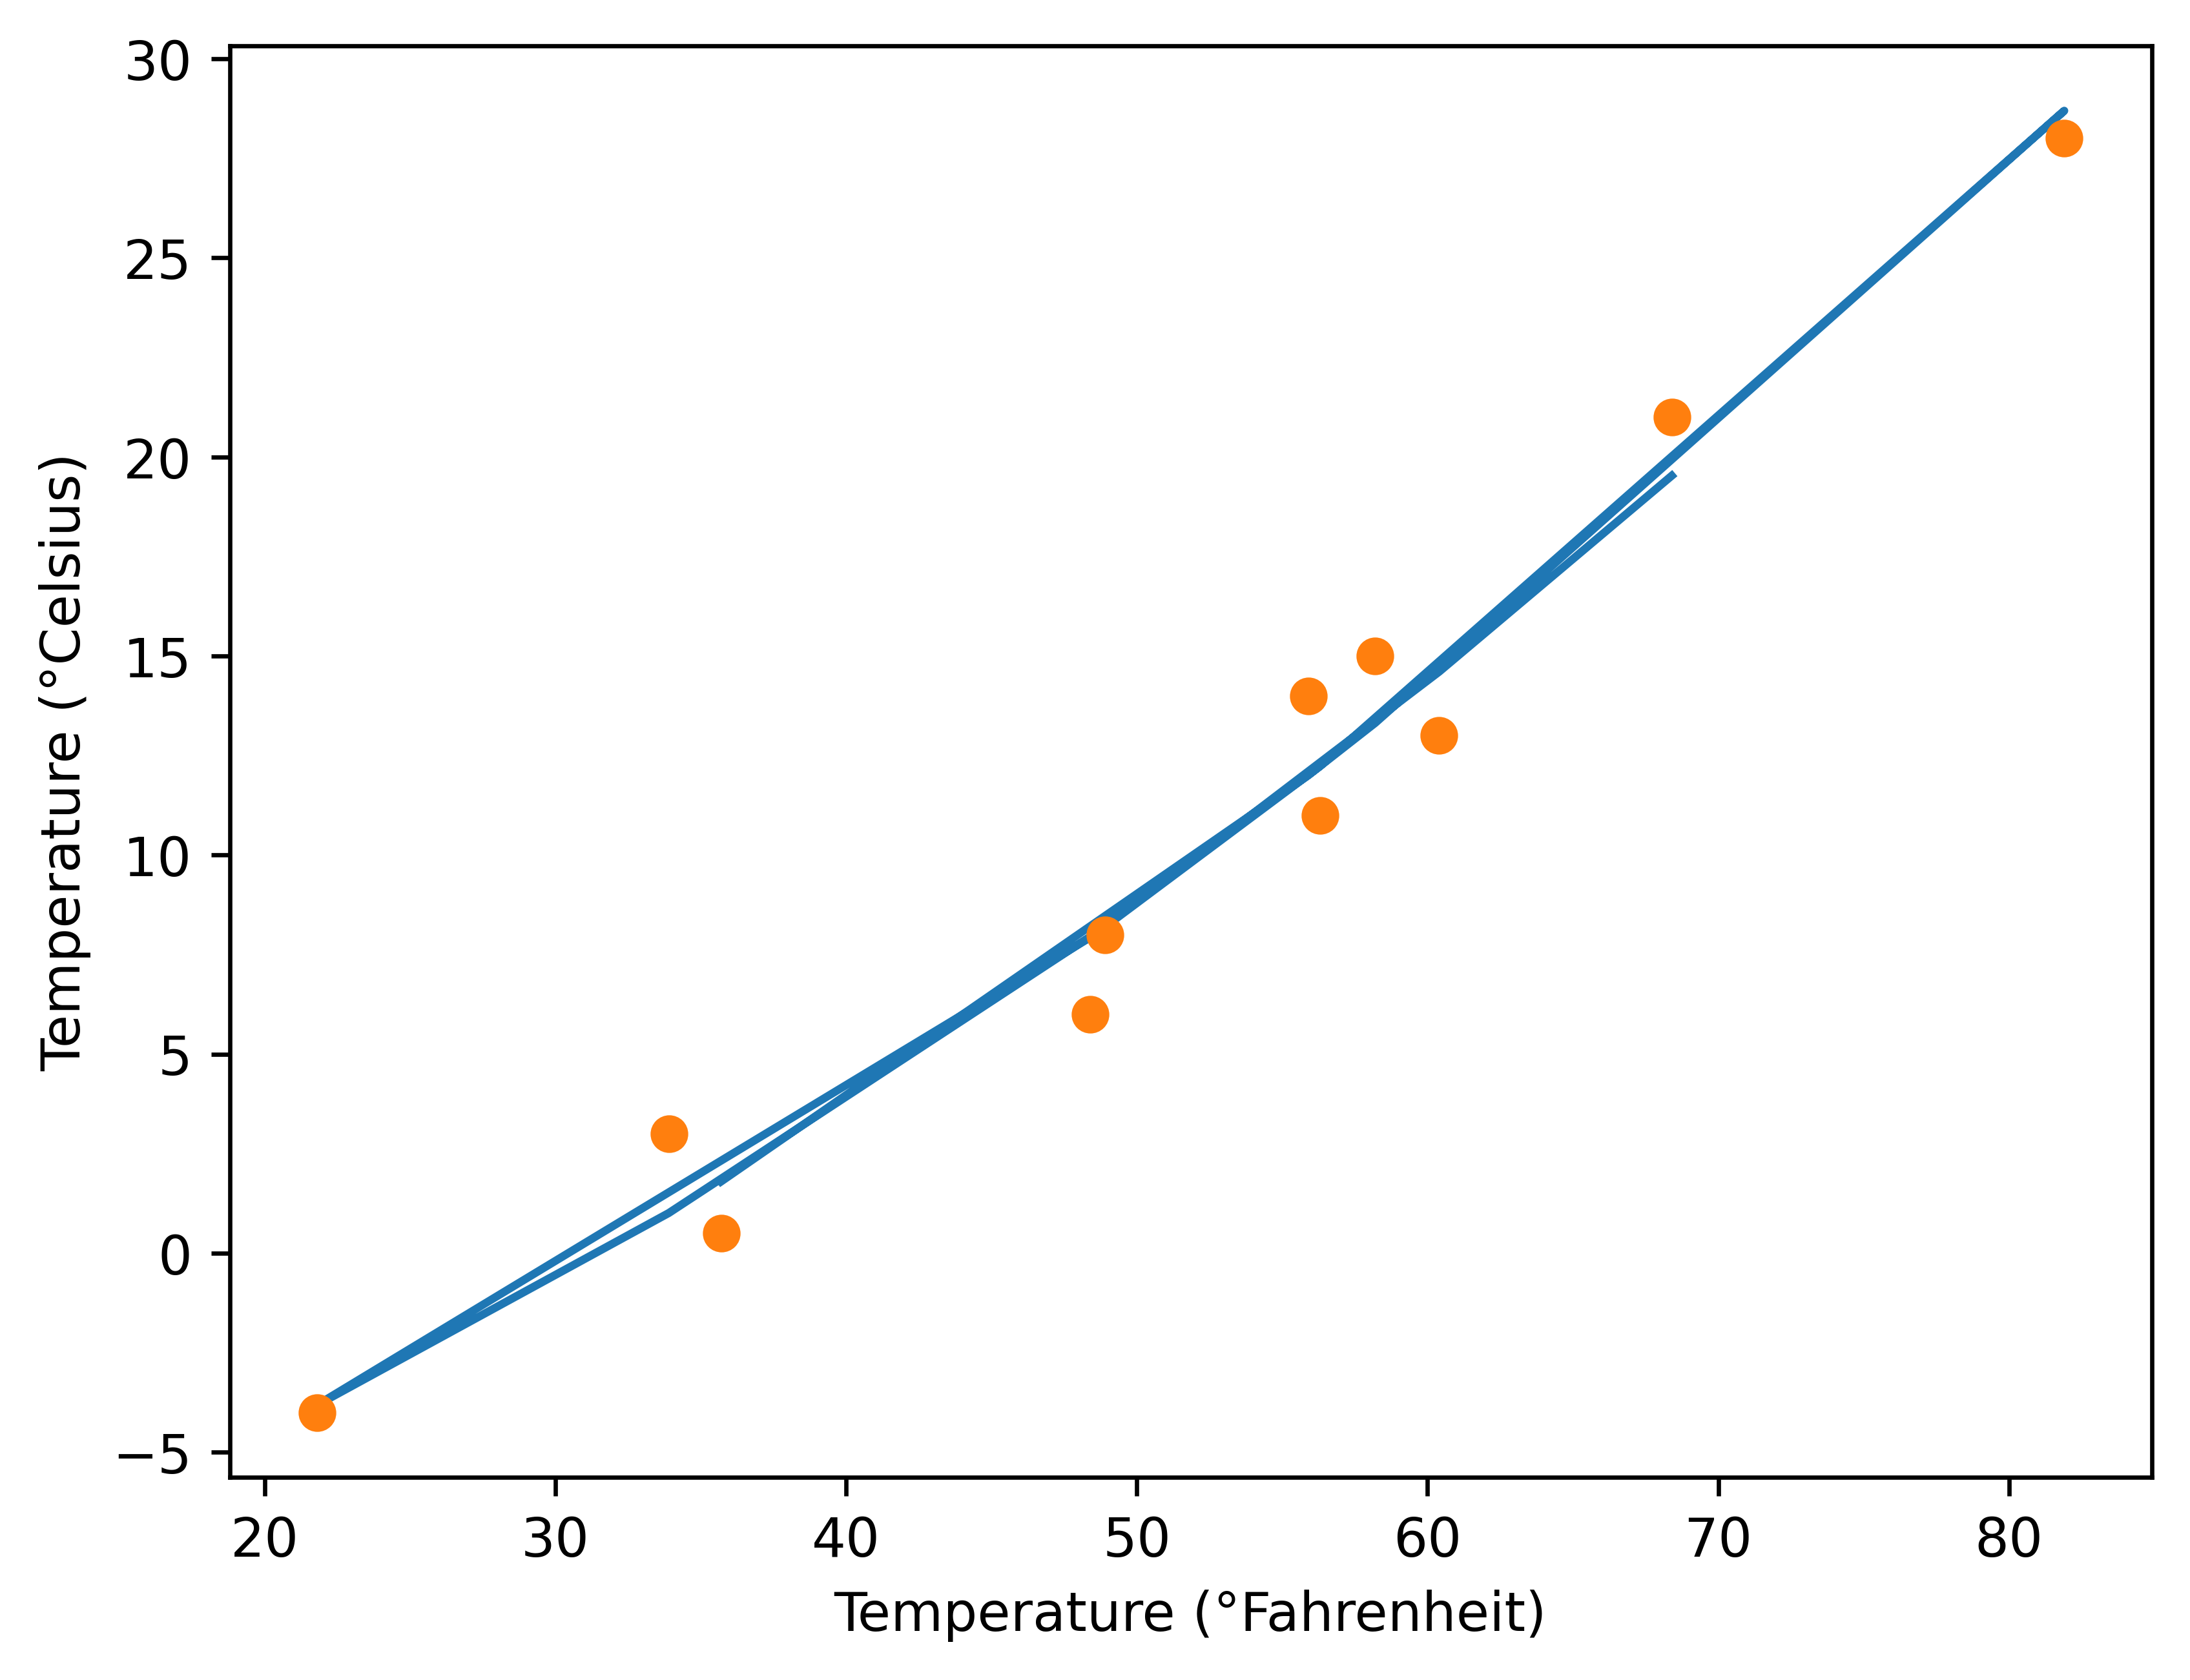

In [235]:
#Has lowest loss
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")



In [236]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learningrate = .01
optimizer = optim.Adam([params], lr = learningrate)

training(
    epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_u =  t_un,
    t_c = t_c
    )

Epoch 500, Loss 57.949375
Epoch 1000, Loss 40.551365
Epoch 1500, Loss 33.974369
Epoch 2000, Loss 27.274963
Epoch 2500, Loss 20.752810
Epoch 3000, Loss 14.940594
Epoch 3500, Loss 10.199280
Epoch 4000, Loss 6.687758
Epoch 4500, Loss 4.367293
Epoch 5000, Loss 3.038020


tensor([19.8351, 27.2414, -7.6692], requires_grad=True)

In [237]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learningrate = .001
optimizer = optim.Adam([params], lr = learningrate)

training(
    epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_u =  t_un,
    t_c = t_c
    )

Epoch 500, Loss 146.404602
Epoch 1000, Loss 129.578949
Epoch 1500, Loss 114.772308
Epoch 2000, Loss 101.786652
Epoch 2500, Loss 90.459236
Epoch 3000, Loss 80.654350
Epoch 3500, Loss 72.255226
Epoch 4000, Loss 65.156609
Epoch 4500, Loss 59.257385
Epoch 5000, Loss 54.453426


tensor([5.2978, 5.4165, 4.0355], requires_grad=True)

In [238]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learningrate = .0001
optimizer = optim.Adam([params], lr = learningrate)

training(
    epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_u =  t_un,
    t_c = t_c
    )

Epoch 500, Loss 163.438293
Epoch 1000, Loss 161.446915
Epoch 1500, Loss 159.478012
Epoch 2000, Loss 157.530380
Epoch 2500, Loss 155.602768
Epoch 3000, Loss 153.694489
Epoch 3500, Loss 151.804749
Epoch 4000, Loss 149.932922
Epoch 4500, Loss 148.078751
Epoch 5000, Loss 146.241913


tensor([1.4946, 1.4952, 0.4935], requires_grad=True)